<a href="https://colab.research.google.com/github/RDEENA/simple_calculator/blob/main/spam_notspam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/diazonic/Machine-Learning-using-sklearn/master/Datasets/spam.tsv',sep ='\t')
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [ ]:
df['message']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

In [ ]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

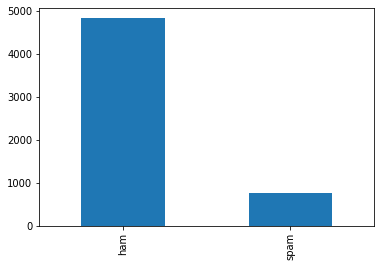

In [ ]:
df['label'].value_counts().plot(kind= 'bar')

In [ ]:
#divide into i/p and o/p
x = df['message'].values   # INPUT
y = df.iloc[:,0].values # iloc[rows,columns] # OUTPUT

In [ ]:
y


array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =0)


In [ ]:
x_train.shape

(4179,)

In [ ]:
x_test.shape

(1393,)

In [ ]:
y_train.shape

(4179,)

In [ ]:
y_test.shape

(1393,)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
x_train_v = vect.fit_transform(x_train)
x_test_v = vect.transform(x_test)

In [ ]:
from sklearn.svm import SVC
model= SVC()
model.fit(x_train_v,y_train)
y_pred = model.predict(x_test_v)
y_pred

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
y_test

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype=object)

In [ ]:
text = df['message'][2]
text

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [ ]:
text =vect.transform([text])
model.predict(text)

array(['spam'], dtype=object)